### Data Preprocessing and Exploratory Data Analysis

#### Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### Data Acquistion and About Dataset

In [ ]:
# Read the Titanic csv File
# Source: https://www.kaggle.com/code/stephaniestallworth/titanic-eda-classification-end-to-end/input?select=train.csv
df_Titanic = pd.read_csv('titanic.csv')

In [ ]:
df_Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('No. of Records:',df_Titanic.shape[0])
print('No. of Features:',df_Titanic.shape[1])
print('Features:', df_Titanic.columns)

No. of Records: 891
No. of Features: 12
Features: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
df_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Data Preprocessing

#### Dropping Not Relevant Features

In [ ]:
df_Titanic['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
# Remove PassengerId, Name, Ticket
df_Titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

#### Missing Data

In [ ]:
#Checking for missing values
df_Titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Remove cabin feature as it has more missing values
df_Titanic.drop('Cabin', axis = 1, inplace = True)

In [ ]:
# Remove records with Embarked missing (Only 2 records)
df_Titanic = df_Titanic.dropna(subset='Embarked')

##### Imputation for Age Feature

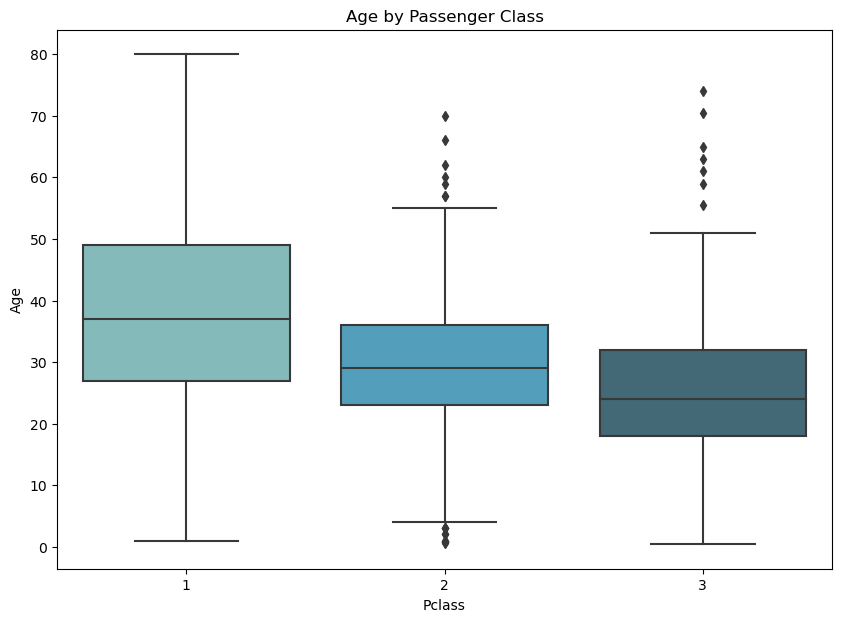

In [ ]:
# Plotting Age by Passenger Class Category
plt.figure(figsize = (10,7))
sb.boxplot(x = 'Pclass', y = 'Age', data = df_Titanic, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

In [ ]:
# Computation of mean age by Passenger Class
age_mean = [df_Titanic[df_Titanic['Pclass'] == 1]['Age'].mean(), df_Titanic[df_Titanic['Pclass'] == 2]['Age'].mean(), df_Titanic[df_Titanic['Pclass'] == 3]['Age'].mean()]
print(age_mean)
age_mean = np.rint(age_mean)
age_mean

[38.10554347826087, 29.87763005780347, 25.14061971830986]


array([38., 30., 25.])

In [ ]:
# Imputation for Age Feature
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return age_mean[0]
        elif Pclass == 2:
            return age_mean[1]
        else:
            return age_mean[2]
    else:
        return Age

# Apply the function to the Age column
df_Titanic['Age']=df_Titanic[['Age','Pclass']].apply(impute_age, axis =1 )

In [ ]:
df_Titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
df_Titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.218414,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.178017,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Target Feature (Class Feature)

In [ ]:
print('Target Feature')
print(df_Titanic.groupby('Survived').size(), 100*df_Titanic.groupby('Survived').size()/len(df_Titanic))

Target Feature
Survived
0    549
1    340
dtype: int64 Survived
0    61.754781
1    38.245219
dtype: float64


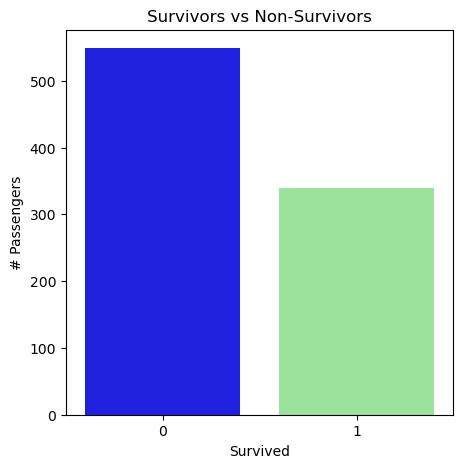

In [ ]:
plt.figure(figsize = (5,5))
sb.countplot(df_Titanic['Survived'], palette= ['blue','lightgreen'])
plt.title('Survivors vs Non-Survivors')
plt.ylabel('# Passengers')
plt.show()

### Data Exploration

#### Numerical Features: Fare, Age

In [ ]:
num_var = ['Age','Fare']

In [ ]:
df_Titanic[num_var].describe()

,Age,Fare
count,889.000000,889.000000
mean,29.218414,32.096681
std,13.178017,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,26.000000,14.454200
75%,36.500000,31.000000
max,80.000000,512.329200


In [ ]:
df_Titanic[df_Titanic['Fare']==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.0,0,0,0.0,S
263,0,1,male,40.0,0,0,0.0,S
271,1,3,male,25.0,0,0,0.0,S
277,0,2,male,30.0,0,0,0.0,S
302,0,3,male,19.0,0,0,0.0,S
413,0,2,male,30.0,0,0,0.0,S
466,0,2,male,30.0,0,0,0.0,S
481,0,2,male,30.0,0,0,0.0,S
597,0,3,male,49.0,0,0,0.0,S
633,0,1,male,38.0,0,0,0.0,S


In [ ]:
df_Titanic.groupby(['Embarked', 'Pclass'])['Fare'].mean()

Embarked  Pclass
C         1         104.718529
          2          25.358335
          3          11.214083
Q         1          90.000000
          2          12.350000
          3          11.183393
S         1          70.364862
          2          20.327439
          3          14.644083
Name: Fare, dtype: float64

In [ ]:
df_Titanic.loc[(df_Titanic['Fare']==0) & (df_Titanic['Embarked']=='S') & (df_Titanic['Pclass']==1),'Fare'] = 70
df_Titanic.loc[(df_Titanic['Fare']==0) & (df_Titanic['Embarked']=='S') & (df_Titanic['Pclass']==2),'Fare'] = 20
df_Titanic.loc[(df_Titanic['Fare']==0) & (df_Titanic['Embarked']=='S') & (df_Titanic['Pclass']==3),'Fare'] = 15

In [ ]:
df_Titanic[df_Titanic['Fare']==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


Text(0.5, 1.0, 'Ticket Fare')

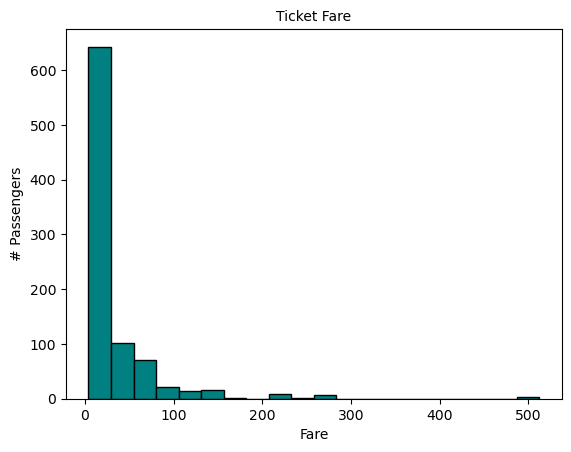

In [ ]:
# Visualization of Fare Feature after updation

plt.hist(df_Titanic['Fare'], bins = 20, edgecolor= 'black', color ='teal')
plt.xlabel('Fare',fontsize = 10)
plt.ylabel('# Passengers',fontsize = 10)
plt.title('Ticket Fare',fontsize = 10)

In [ ]:
# Remove the records with outlier values for the feature Fare
df_Titanic[df_Titanic['Fare']>300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


In [ ]:
df_Titanic = df_Titanic.drop(df_Titanic[df_Titanic['Fare']>300].index)

In [ ]:
# or it can be updated with mean value of fare for Embarked = C

In [ ]:
df_Titanic['Age'].skew()

0.5166563526523346

<AxesSubplot:xlabel='Age', ylabel='Count'>

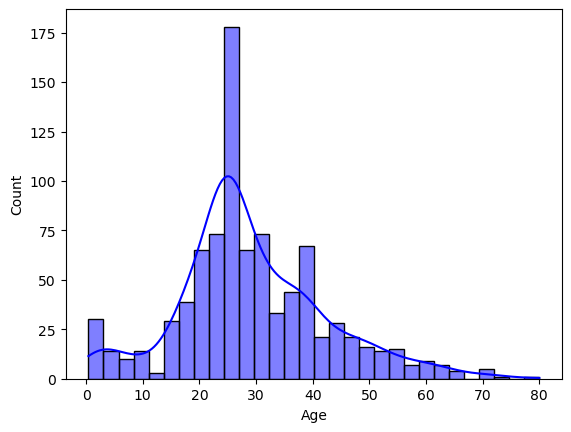

In [ ]:
sb.histplot(df_Titanic['Age'], kde=True, bins=30, color='blue')

In [ ]:
df_Titanic['Fare'].skew()

3.187478107835326

<AxesSubplot:xlabel='Fare', ylabel='Count'>

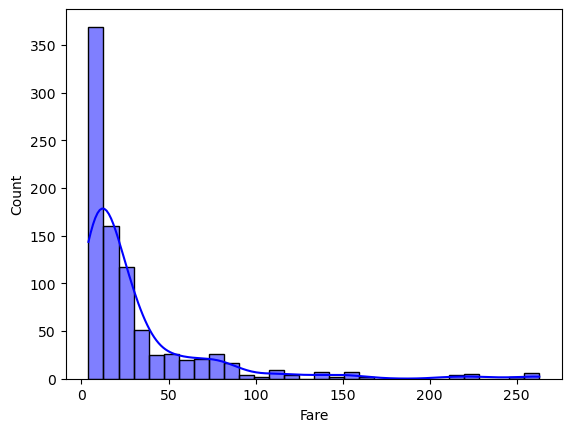

In [ ]:
sb.histplot(df_Titanic['Fare'], kde=True, bins=30, color='blue')

In [ ]:
# Survival Analysis (Target Feature) upon Numeric variables

In [ ]:
# Fare

In [ ]:
df_Titanic[df_Titanic['Survived']==0].Fare.describe()

count    549.000000
mean      23.055956
std       31.513256
min        4.012500
25%        7.895800
50%       11.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare'>

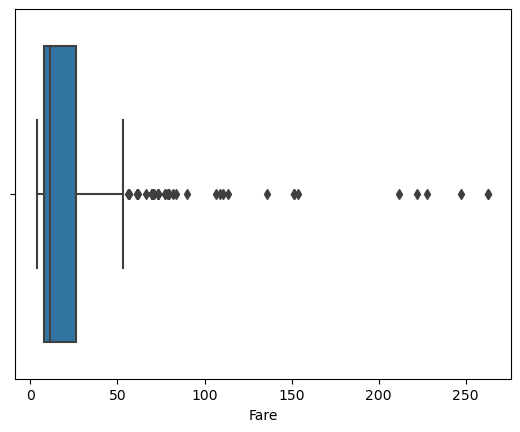

In [ ]:
sb.boxplot(df_Titanic[df_Titanic['Survived']==0].Fare)

In [ ]:
df_Titanic[df_Titanic['Survived']==1].Fare.describe()

count    337.000000
mean      44.122379
std       50.512497
min        6.975000
25%       12.475000
50%       26.000000
75%       56.495800
max      263.000000
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare'>

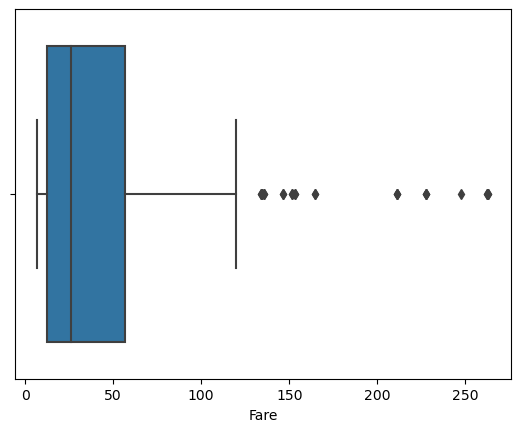

In [ ]:
sb.boxplot(df_Titanic[df_Titanic['Survived']==1].Fare)

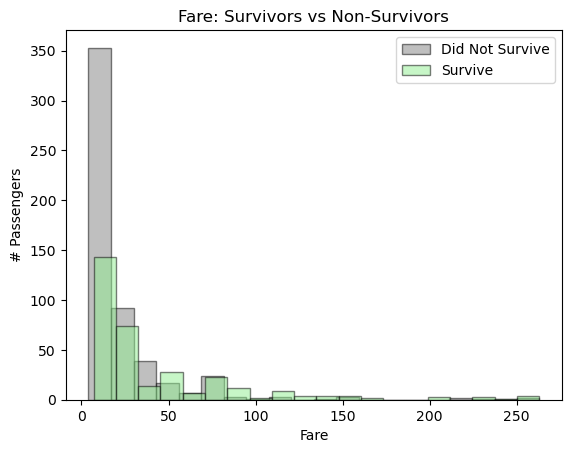

In [ ]:
# Survival Analysis based on Fare feature
plt.hist(df_Titanic[df_Titanic['Survived']==0].Fare, bins = 20, alpha=0.5, label ='Did Not Survive', edgecolor= 'black',color ='grey')
plt.hist(df_Titanic[df_Titanic['Survived']==1].Fare, bins = 20, alpha=0.5, label = 'Survive', edgecolor = 'black',color = 'lightgreen')
plt.title('Fare: Survivors vs Non-Survivors')
plt.xlabel('Fare')
plt.ylabel('# Passengers')
plt.legend(loc = 'upper right')

Text(0.5, 1.0, 'Age')

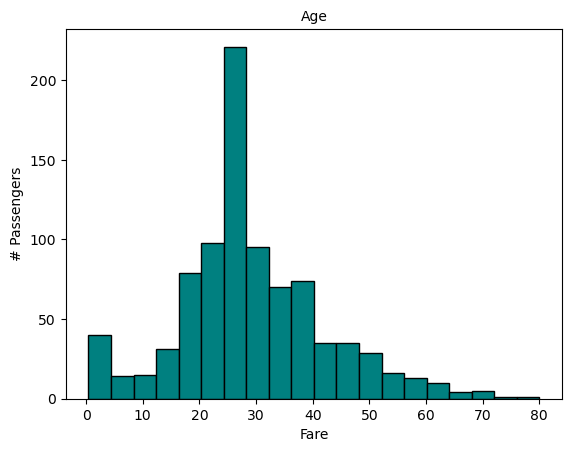

In [ ]:
# Visualization of Age Feature

plt.hist(df_Titanic['Age'], bins = 20, edgecolor= 'black',color ='teal')
plt.xlabel('Fare',fontsize = 10)
plt.ylabel('# Passengers',fontsize = 10)
plt.title('Age',fontsize = 10)

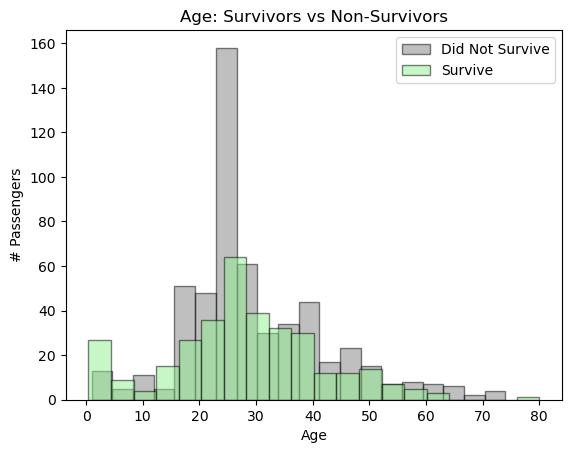

In [ ]:
# Survival Analysis based on Age feature
plt.hist(df_Titanic[df_Titanic['Survived']==0].Age, bins = 20, label ='Did Not Survive', alpha = .50,edgecolor= 'black',color ='grey')
plt.hist(df_Titanic[df_Titanic['Survived']==1].Age, bins = 20, label = 'Survive', alpha = .50, edgecolor = 'black',color = 'lightgreen')
plt.title('Age: Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('# Passengers')
plt.legend(loc = 'upper right')

#### Discrete Features: Pclass, SibSp, Parch

#### Crosstab analysis of discrete features on the target

In [ ]:
# Feature Pclass
df_Titanic.groupby('Pclass').size()

Pclass
1    211
2    184
3    491
dtype: int64

In [ ]:
pd.crosstab(index = df_Titanic['Pclass'], columns = df_Titanic['Survived'])

Survived,0,1
Pclass,,
1,80,131
2,97,87
3,372,119


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

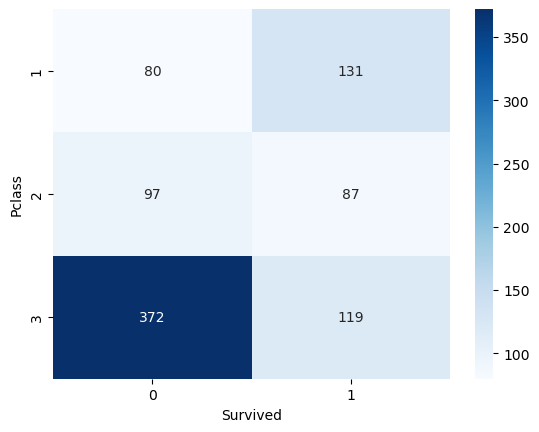

In [ ]:
sb.heatmap(pd.crosstab(index = df_Titanic['Pclass'], columns = df_Titanic['Survived']), annot=True, cmap='Blues', fmt='d')

In [ ]:
# Feature SibSp
df_Titanic.groupby('SibSp').size()

SibSp
0    603
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [ ]:
pd.crosstab(index = df_Titanic['SibSp'], columns = df_Titanic['Survived'])

Survived,0,1
SibSp,,
0,398,205
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [ ]:
# Feature Parch
df_Titanic.groupby('Parch').size()

Parch
0    674
1    117
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [ ]:
pd.crosstab(index = df_Titanic['Parch'], columns = df_Titanic['Survived'])

Survived,0,1
Parch,,
0,445,229
1,53,64
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


#### Categorical Features: Sex, Embarked

#### Crosstab Analysis of Categorical Features on Target

In [ ]:
# Feature Sex
df_Titanic.groupby('Sex').size()

Sex
female    311
male      575
dtype: int64

In [ ]:
pd.crosstab(index = df_Titanic['Sex'], columns = df_Titanic['Survived'])

Survived,0,1
Sex,,
female,81,230
male,468,107


In [ ]:
# Feature Embarked
df_Titanic.groupby('Embarked').size()

Embarked
C    165
Q     77
S    644
dtype: int64

In [ ]:
pd.crosstab(index = df_Titanic['Embarked'], columns = df_Titanic['Survived'])

Survived,0,1
Embarked,,
C,75,90
Q,47,30
S,427,217


#### Encoding of Categorical Features

In [ ]:
df_Titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df_Titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# Convert categorical variables into dummy variables
sex = pd.get_dummies(df_Titanic['Sex'], drop_first = True)
embarked = pd.get_dummies(df_Titanic['Embarked'], drop_first = True)

In [ ]:
# Add new dummy columns to data frame
df_Titanic = pd.concat([df_Titanic, sex, embarked], axis = 1)
df_Titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [ ]:
# Removing the features Sex, Embarked
df_Titanic = df_Titanic.drop(['Sex','Embarked'], axis = 1)

In [ ]:
df_Titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Other ways

In [ ]:
df = pd.read_csv('titanic.csv')

#### Imputation for Age

<AxesSubplot:>

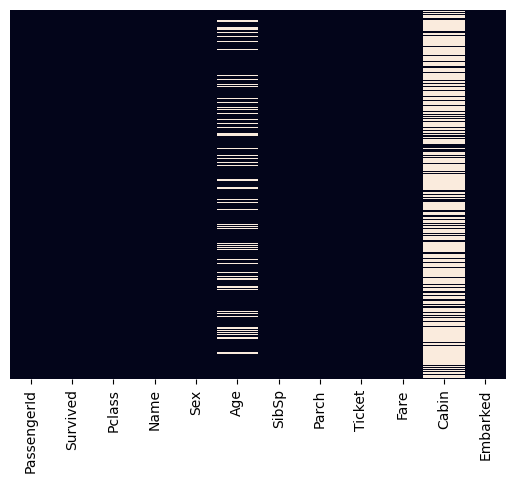

In [ ]:
sb.heatmap(df.isnull(),yticklabels = False, cbar = False)

In [ ]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [ ]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
# replace rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)

In [ ]:
# confirm that we are left with just six values
df['Title'].value_counts()

In [ ]:
# impute missing Age values using median of Title groups
title_ages = dict(df.groupby('Title')['Age'].median())
title_ages

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 46.5,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 3.5,
 'Miss': 21.0,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 30.0,
 'Mrs': 35.0,
 'Ms': 28.0,
 'Rev': 46.5,
 'Sir': 49.0}

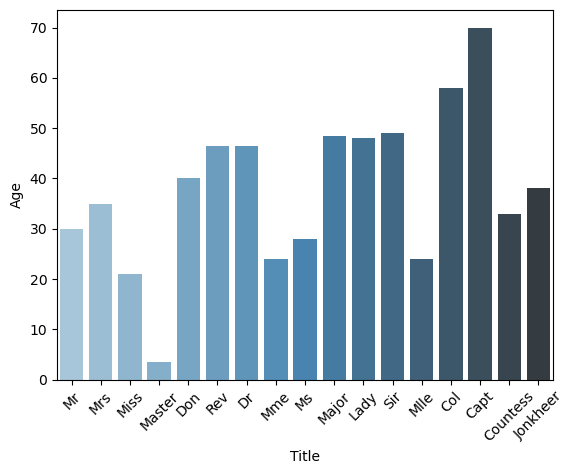

In [ ]:
sb.barplot(x='Title', y='Age', data=df, estimator=np.median, ci=None, palette='Blues_d')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# create a column of the average ages
df['age_med'] = df['Title'].apply(lambda x: title_ages[x])

In [ ]:
# replace all missing ages with the value in this column
df['Age'].fillna(df['age_med'], inplace=True)

In [ ]:
df['Age'].isnull().sum()

0

#### Survival based on Age Title

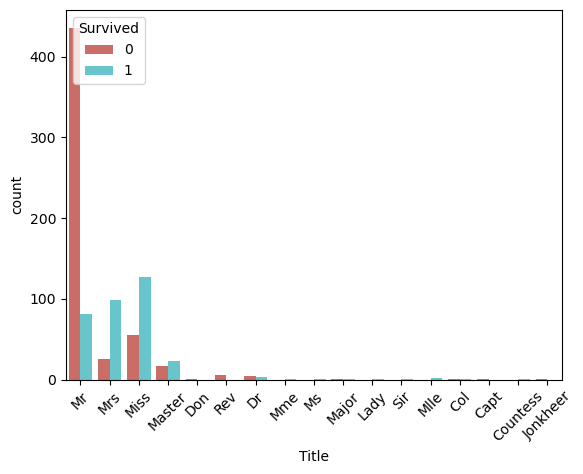

In [ ]:
sb.countplot(x='Title', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

#### Exploaration of survival based on family count

In [ ]:
df['FamilyCount']=df.SibSp+df.Parch

In [ ]:
df.groupby(df.FamilyCount).size()

FamilyCount
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
dtype: int64

In [ ]:
pd.crosstab(index = df.FamilyCount, columns = df['Survived'])

Survived,0,1
FamilyCount,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


In [ ]:
pd.crosstab(df['FamilyCount'], df['Survived'], normalize='index') * 100

Survived,0,1
FamilyCount,,
0,69.646182,30.353818
1,44.720497,55.279503
2,42.156863,57.843137
3,27.586207,72.413793
4,80.000000,20.000000
5,86.363636,13.636364
6,66.666667,33.333333
7,100.000000,0.000000
10,100.000000,0.000000


#### Way for filling missing value in Embarked column

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df[df['Cabin']=='B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df[df['Ticket']=='113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df[df['Fare'] ==80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
